# Perform Principal component analysis and perform clustering using first 3 principal component scores
# (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters 
# and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df

In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [3]:
wine=pd.read_csv("F:/ExcelR workings/Assignments/PCA/wine.csv")

In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine.Type.unique()

array([1, 2, 3], dtype=int64)

In [16]:
# Considering only numerical data 
Wine=wine.iloc[:,1:]
Wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
# Normalizing the numerical data 
wine_normal = scale(Wine)

In [12]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
pca=PCA()
pca_values=pca.fit_transform(wine_normal)

In [33]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
# The amount of variance that each PCA explains is 
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [15]:
# Cumulative variance 
var1=np.cumsum(np.round(var, decimals= 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [21]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

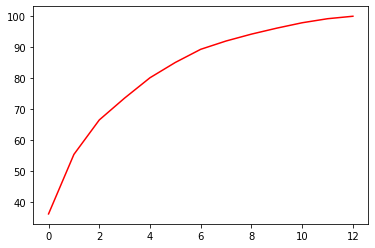

In [22]:
# Variance plot for PCA components obtained 
plt.plot(var1,color='red')

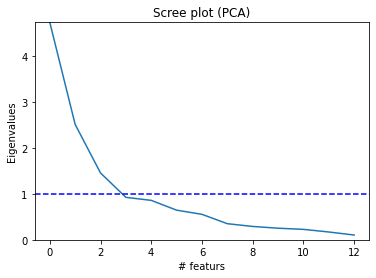

In [23]:
#scree plot
plt.ylim(0,max(pca.explained_variance_))
plt.plot(pca.explained_variance_);
plt.xlabel("# featurs");plt.ylabel("Eigenvalues");
plt.title("Scree plot (PCA)")
plt.axhline(y=1,color='b',linestyle='--')

## As per Scree plot figure, PC(1, 2 , and 3) are enough to describe the data.

In [27]:
pca_values[:,0:2]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

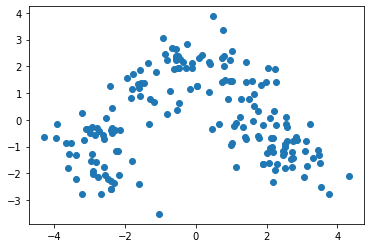

In [28]:
# plot between PC1 and PC2 
x=pca_values[:,0:1]
y=pca_values[:,1:2]
z=pca_values[:,2:3]
plt.scatter(x,y)

## There is no correlation between PC1 and PC2

In [29]:
from mpl_toolkits.mplot3d import Axes3D

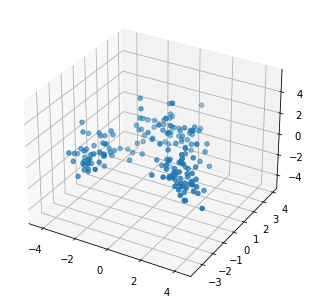

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)
plt.show()

# Hierarchical Clustering

In [31]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [32]:
df=pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])

In [34]:
df.head()

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


<AxesSubplot:>

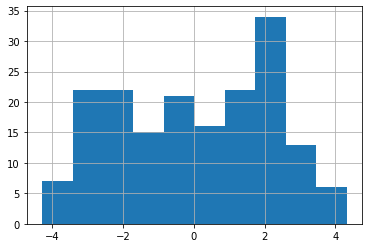

In [36]:
df['pc1'].hist()

<AxesSubplot:>

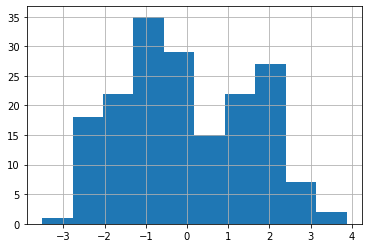

In [38]:
df['pc2'].hist()

<AxesSubplot:>

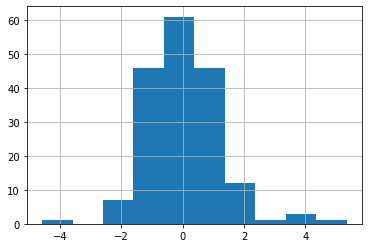

In [37]:
df['pc3'].hist()

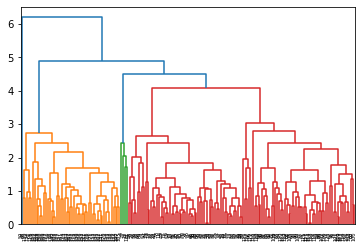

In [39]:
dendrogram=sch.dendrogram(sch.linkage(df,method='average'))

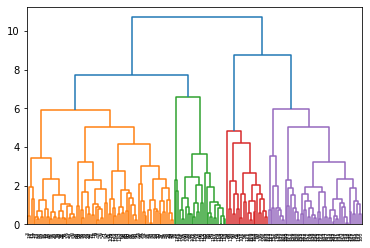

In [40]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

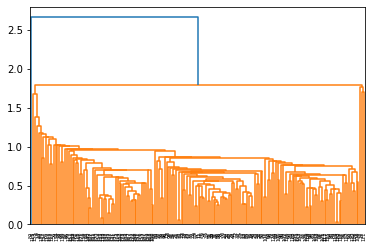

In [41]:
dendrogram=sch.dendrogram(sch.linkage(df,method='single'))

In [42]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [43]:
y_hc=hc.fit_predict(df)
CLusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [45]:
Data=df.copy()

In [46]:
Data['Cluster_id']=hc.labels_
Data

,pc1,pc2,pc3,Cluster_id
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [47]:
Data["Cluster_id"].unique()

array([0, 2, 1], dtype=int64)

# K-Means

In [48]:
from sklearn.cluster import KMeans

## The K-means algorithm aims to choose centroids that minimise the interia

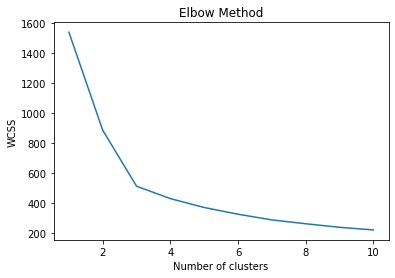

In [50]:
# wcss stands for within-cluster-sum-of-squares(Elbow plot)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
#wcss
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()

### we have to select the value of k(number of clusters) at the “elbow”  point.

In [51]:
# Build Cluster algorithm
clusters=KMeans(3,random_state=42)
clusters.fit(df)

KMeans(n_clusters=3, random_state=42)

In [52]:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [53]:
Data2=df.copy()

In [54]:
Data2['kmean_clusters']=clusters.labels_
Data2.head()

,pc1,pc2,pc3,kmean_clusters
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [55]:
# Comparison
C=pd.DataFrame({"Clustering methods":['Original data (Given column)','Heirarchial Clustering','K-means Clustering'],
                "Clusters":[wine['Type'].unique(),Data.Cluster_id.unique(),Data2.kmean_clusters.unique()],"No. of cluster":[3,3,3]})
C

,Clustering methods,Clusters,No. of cluster
0,Original data (Given column),"[1, 2, 3]",3
1,Heirarchial Clustering,"[0, 2, 1]",3
2,K-means Clustering,"[1, 2, 0]",3
